# Wine Analysis

- Piotr Tylczyński
- Mateusz Kempa

## Imports

In [59]:
import copy

import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

## Read data

In [60]:
df = pd.read_csv('winequality-red.csv')

## Examining data

### Columns

In [61]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Columns describe

In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


## Prepare data

### Remove class from attributes

In [63]:
data_X = df.drop(columns=['quality'])
data_Y = df.quality

print(data_X)
print(data_Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Normalize


In [64]:
data_X = MaxAbsScaler().fit(data_X).transform(data_X)

### Split to train and test

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
print('Train size: ', len(X_train))
print('Test size: ', len(X_test))

Train size:  1279
Test size:  320


### Choosing best k

Text(0, 0.5, 'acc')

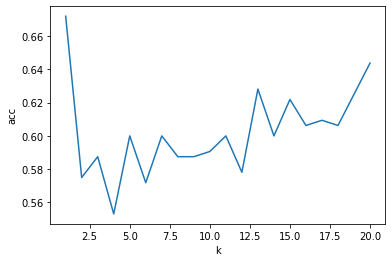

In [66]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data_X, train_data_Y)
    pred = neigh.predict(test_data_X)
    return accuracy_score(test_data_Y, pred)

ks = [x for x in range(1, 21)]
accs = []
for k in ks:
    acc = get_classification_accuracy(X_train, Y_train, X_test, Y_test, k=k)
    accs.append(acc)
plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('acc')

Re-run to check if classification is always better as k grows. Now we will split data into test and train few times

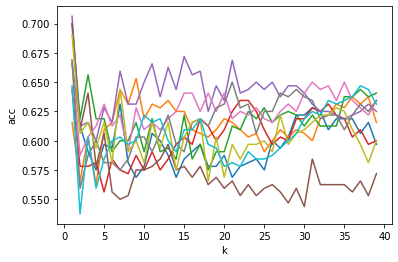

In [67]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2)
    ks = [x for x in range(1, 40)]
    accs = []
    for k in ks:
        acc = get_classification_accuracy(X_train, Y_train, X_test, Y_test, k=k)
        accs.append(acc)
    plt.plot(ks, accs)
    plt.xlabel('k')
    plt.ylabel('acc')

Generally speaking, it seems to accuracy will drop and further stabilize at some level as k grows, but some
of the runs shows accuracy growth as k grow.

This could be due to imbalance in number of elements in each class in data. Now we try with stratification.

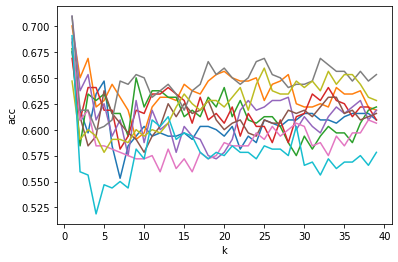

In [68]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, stratify=data_Y)
    ks = [x for x in range(1, 40)]
    accs = []
    for k in ks:
        acc = get_classification_accuracy(X_train, Y_train, X_test, Y_test, k=k)
        accs.append(acc)
    plt.plot(ks, accs)
    plt.xlabel('k')
    plt.ylabel('acc')

Thanks to stratification we get rid of these outliers. Now we can see that accuracy will stabilize at some level
as k grows. We can infer that ks near 0 are not worse than all other / higher ks per each run.

We have chosen that best k value is 1

## Train kNN algorithm

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, stratify=data_Y)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)